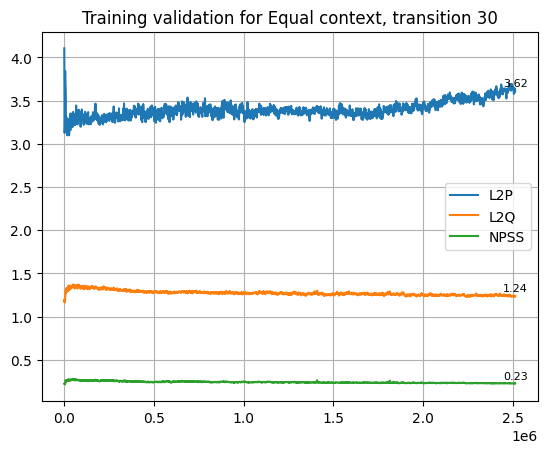

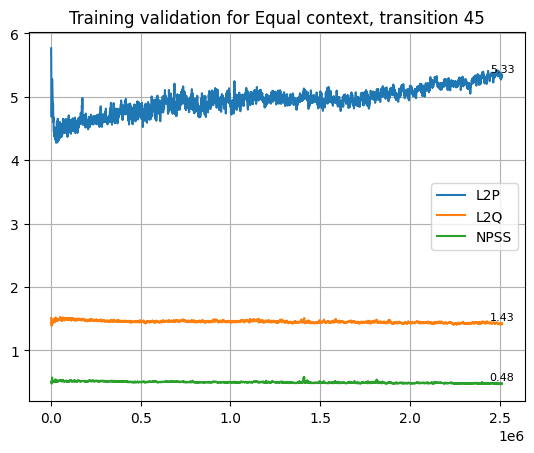

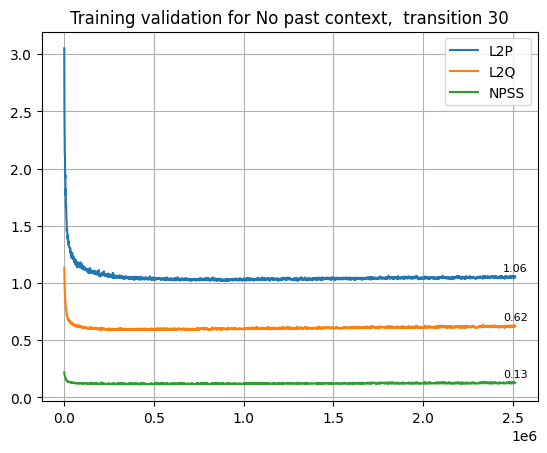

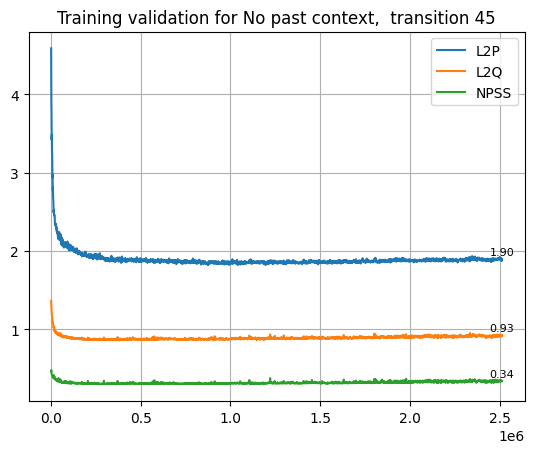

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tests = [
    {"name": "Equal context, transition 30",
     "path": 'E:/Users/qesterius/Documents/Studia/magisterka/motion_inbetweening_based_on_context_tail/experiments/lafan1_context_model_ending_transition_best_newest/equal_past_transition_30.csv'},
    {"name": "Equal context, transition 45",
     "path": 'E:/Users/qesterius/Documents/Studia/magisterka/motion_inbetweening_based_on_context_tail/experiments/lafan1_context_model_ending_transition_best_newest/equal_past_transition_45.csv'},
    {"name": "No past context,  transition 30",
     "path": 'E:/Users/qesterius/Documents/Studia/magisterka/motion_inbetweening_based_on_context_tail/experiments/lafan1_context_model_ending_transition_best_newest/no_past_transition_30.csv'},
    {"name": "No past context,  transition 45",
     "path": 'E:/Users/qesterius/Documents/Studia/magisterka/motion_inbetweening_based_on_context_tail/experiments/lafan1_context_model_ending_transition_best_newest/no_past_transition_45.csv'}
]


mapping_metric_names = { "npss": "NPSS", "gpos":"L2P", "gquat":"L2Q" }
last_epoch_results = []

for test in tests:
    results = pd.read_csv(test["path"], index_col=0)
    for metric in results["Metric"].unique():
        metric_values = results[results["Metric"] == metric]["Loss"]
        plt.plot(results.index[::3], metric_values, label=mapping_metric_names[metric])
        plt.legend()
        #add point with value to last element
        plt.annotate(f"{metric_values.values[-1]:.2f}", 
                    xy=(results.index[-1], metric_values.values[-1]), 
                    xytext=(results.index[-1], metric_values.values[-1] + 0.05),
                    ha='center', fontsize=8, color='black')    
    plt.grid()
    plt.title(f"Training validation for {test['name']}")
    plt.show()
    


    

In [7]:
for test in tests[2:]:
    for metric in results["Metric"].unique():
        results = pd.read_csv(test["path"], index_col=0)
        metric_values = results[results["Metric"] == metric]["Loss"]
        print(f"{test['name']}: {mapping_metric_names[metric]}: {metric_values.values[-1]:.4f}")

No past context,  transition 30: L2P: 1.0551
No past context,  transition 30: L2Q: 0.6243
No past context,  transition 30: NPSS: 0.1284
No past context,  transition 45: L2P: 1.8980
No past context,  transition 45: L2Q: 0.9268
No past context,  transition 45: NPSS: 0.3442


EVAL DATA


In [9]:
results.columns[-3:]

Index(['gpos', 'gquat', 'npss'], dtype='object')

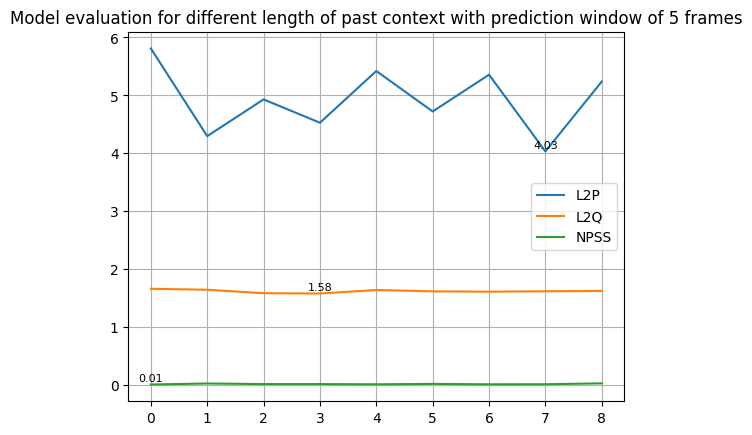

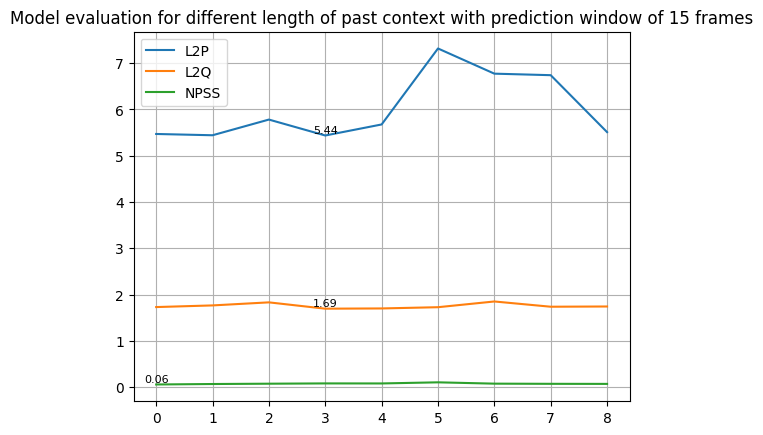

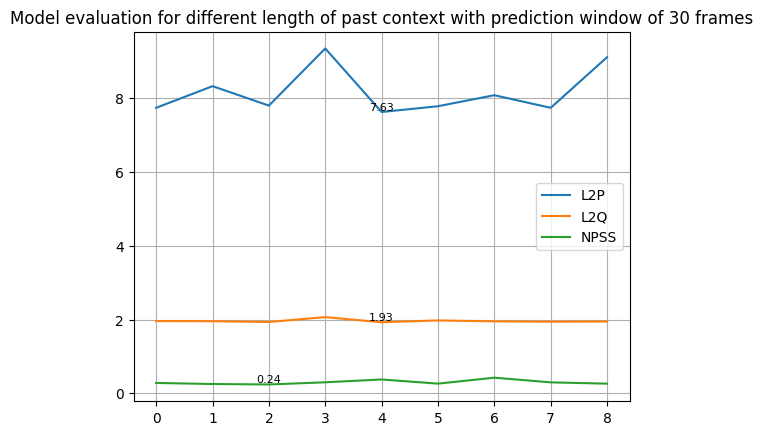

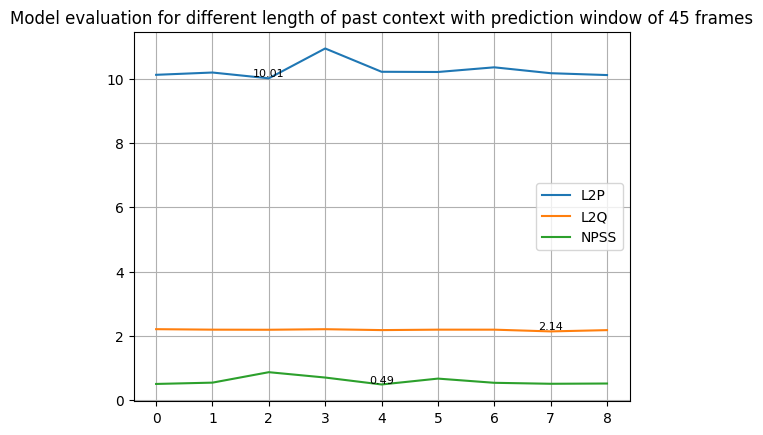

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
results = pd.read_csv("results.csv", index_col=0)
mapping_metric_names = { "npss": "NPSS", "gpos":"L2P", "gquat":"L2Q" }
baseline = {"5": 0.17 0.49 1.07 2.00 0.13 0.33 0.60 0.92 0.0015 0.0212 0.1238}
for t in results["trans"].unique():
    trans_values = results[results["trans"]==t]
    for metric in results.columns[-3:]:
        plt.plot(trans_values["past_context"],trans_values[metric], label=mapping_metric_names[metric])
        plt.legend()
        # Find the smallest value of the metric
        min_value = trans_values[metric].min()
        # Find the corresponding past_context for the smallest value
        min_value_past_ctx = trans_values[trans_values[metric] == min_value]["past_context"].values[0]
        
        # Annotate the smallest value on the plot
        plt.annotate(f"{min_value:.2f}", 
                     xy=(min_value_past_ctx, min_value), 
                     xytext=(min_value_past_ctx, min_value + 0.05),
                     ha='center', fontsize=8, color='black')
    
         
         
    plt.title(f"Model evaluation for different length of past context with prediction window of {t} frames")
    plt.grid()
    plt.show()